In [1]:
%matplotlib inline

In [2]:
# stdlib imports
from datetime import datetime
import io

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Local imports
from libcomcat.search import get_event_by_id, search

# Classes Overview
----
The three main classes used in this library included (in order of increasing complexity) SummaryEvent, DetailEvent, Product.


## Contents
----
- [SummaryEvent](#SummaryEvent)
    - [SummaryEvent Properties](#SummaryEvent-Properties)
    - [SummaryEvent Class Methods](#SummaryEvent-Class-Methods) 
- [DetailEvent](#DetailEvent)
    - [DetailEvent Properties](#DetailEvent-Properties)
    - [DetailEvent Class Methods](#DetailEvent-Class-Methods) 
- [Product](#Product)
    - [Product Properties](#Product-Properties)
    - [Product Class Methods](#Product-Class-Methods) 



## SummaryEvent
The SummaryEvent object is returned from the `search` method. This class includes basic information about the event. 

## SummaryEvent Properties

- **alert**: Pager alert level ('green', 'yellow', 'orange', 'red').
- **depth**: Earthquake depth from the authoritative origin.
- **id**: Earthquake ID from the authoritative origin.
- **latitude**: Earthquake latitude from the authoritative origin.
- **location**: String denoting the earthquake location.
- **longitude**: Earthquake longitude from the authoritative origin.
- **magnitude**: Earthquake magnitude from the authoritative origin.|
- **properties**: List of event properties.
- **time**: Earthquake time from the authoritative origin.
- **url**: COMCAT url associated with the event.

In [3]:
earthquake = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   orderby='magnitude', limit=1)[0]
print("%s occurred on %s with a magnitude of %s and depth of %s" %
     (earthquake.id, earthquake.time, earthquake.magnitude,
      earthquake.depth))

ci3144585 occurred on 1994-01-17 12:30:55.390000 with a magnitude of 6.7 and depth of 18.202


## SummaryEvent Class Methods 

- **getDetailEvent**: If you would like to access products and the files associated with them, you need to access the detail event. This returns the DetailEvent object.
- **getDetailURL**: This returns the url associated with the event.
- **hasProduct**: While the class has a defined list of products, there might not be an available product if it was previously deleted or superseded. This checks that there is an undeleted product available.
- **hasProperty**: This checks a property and whether that property has a value.
- **toDict**: Returns the properties as an ordered dictionary.

In [4]:
## Check for product
product = earthquake.hasProduct('shakemap')
print('Includes "shakemap" as a product: %s' % product)

## Check for property
prop = earthquake.hasProperty('station')
print('Includes "station" as a property: %s' % prop)

## Get URL
url = earthquake.getDetailURL()
print('Event URL: %s' % url)

## Get DetailEvent
detail = earthquake.getDetailEvent()
print('DetailEvent: %s' % detail)

## Get dictionary
event_dict = earthquake.toDict()
print('Event Dictionary: %s' % event_dict)

Includes "shakemap" as a product: True
Includes "station" as a property: False
Event URL: https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci3144585&format=geojson
DetailEvent: ci3144585 1994-01-17 12:30:55.390000 (34.213,-118.537) 18.2 km M6.7
Event Dictionary: OrderedDict([('id', 'ci3144585'), ('time', datetime.datetime(1994, 1, 17, 12, 30, 55, 390000)), ('location', '1km NNW of Reseda, CA'), ('latitude', 34.213), ('longitude', -118.537), ('depth', 18.202), ('magnitude', 6.7), ('alert', None), ('url', 'https://earthquake.usgs.gov/earthquakes/eventpage/ci3144585')])


## DetailEvent
The DetailEvent object can being acquired using the SummaryEvent method `getDetailEvent`, or from the search method `get_event_by_id`. This class includes basic information about the event and access to all available product files. 


### DetailEvent Properties

- **alert**: Pager alert level ('green', 'yellow', 'orange', 'red').
- **depth**: Earthquake depth from the authoritative origin.
- **detail_url**: Detailed COMCAT urls with json.
- **id**: Earthquake ID from the authoritative origin.
- **latitude**: Earthquake latitude from the authoritative origin.
- **location**: String denoting the earthquake location.
- **longitude**: Earthquake longitude from the authoritative origin.
- **magnitude**: Earthquake magnitude from the authoritative origin.
- **properties**: List of event properties.
- **products**: List of event products.
- **time**: Earthquake time from the authoritative origin.
- **url**: COMCAT url associated with the event.

In [5]:
ci3144585 = get_event_by_id('ci3144585');
print("The products in for the event, '%s', include: %s" %
     (ci3144585.id, ci3144585.products))

The products in for the event, 'ci3144585', include: ['associate', 'dyfi', 'focal-mechanism', 'general-link', 'impact-text', 'moment-tensor', 'nearby-cities', 'origin', 'phase-data', 'shakemap', 'trump-shakemap']


### DetailEvent Class Methods

- **getDetailURL**: This returns the url associated with the event.
- **getNumVersions**: Gets the number of versions associated with a given product.
- **getProducts**: Gets the Product object.
    - Input parameters can control which version(s) and source(s) the product comes from 
    - source options include: "preferred" (default), "all", any valid source network (e.g. 'us', 'ak')
    - version options include: "preferred" (default), "first", "last", and "all"
- **hasProduct**: While the class has a defined list of products, there might not be an available product if it was previously deleted or superseded. This checks that there is an undeleted product available.
- **hasProperty**: This checks a property and whether that property has a value.
- **toDict**: Returns the properties as an ordered dictionary.

In [6]:
## Get 'preferred' phase-data product for the 'preferred' source
preferred_product = ci3144585.getProducts('phase-data')
print('Preferred product: %s\nThis always returns one product.' % preferred_product)

## Get 'preferred' phase-data product for 'all' sources
all_product = ci3144585.getProducts('phase-data', source='all')
print('Preferred version with all sources returns %s products: %s\n' % 
      (len(all_product), all_product))

## Get 'last' phase-data product for 'all' sources
last_product = ci3144585.getProducts('phase-data', source='us', version='first')
print('Last version with us sources returns %s products: %s\n' % 
      (len(last_product), last_product))

## Get the number of versions of the phase-data product
num_versions = ci3144585.getNumVersions('phase-data')
print('There are %s versions.' % num_versions)

Preferred product: [Product phase-data from ci updated 2016-04-02 08:37:01.510000 containing 2 content files.]
This always returns one product.
Preferred version with all sources returns 2 products: [Product phase-data from ci updated 2016-04-02 08:37:01.510000 containing 2 content files., Product phase-data from us updated 2014-11-07 00:54:47.324000 containing 2 content files.]

Last version with us sources returns 1 products: [Product phase-data from us updated 2014-11-07 00:54:47.324000 containing 2 content files.]

There are 2 versions.


## Product
The Product object can being acquired using the DetailEvent method `getProducts`. This class includes basic information about the event and access to all available product files. 

### Product Properties
- **contents**: List of the products contents (files).
- **preferred_weight**: The weight assigned to the product by COMCAT.
- **product_timestamp**: The timestamp that defines when the product was submitted. This can be used as a proxy for the version number.
- **properties**: List of product properties. Values can be accessed using the '[]' operator.
- **source**: The source that contributed to the product.
- **update_time**: Datetime for the product's update time.
- **version**: A version number derived by sorting products by the timestamp.

In [7]:
product = ci3144585.getProducts('shakemap')[0]

## list the product properties
for prop in product.properties:
    print('%s: %s' % (prop, product[prop]))

depth: 19
event-description: Northridge, California
event-type: ACTUAL
eventsource: atlas
eventsourcecode: 19940117123055
eventtime: 1994-01-17T12:30:55.000Z
latitude: 34.211
longitude: -118.546
magnitude: 6.6
map-status: RELEASED
maximum-latitude: 35.658250
maximum-longitude: -116.796000
maxmmi: 8.6
minimum-latitude: 32.763750
minimum-longitude: -120.296000
overlayHeight: 387
overlayWidth: 468
process-timestamp: 2017-04-07T23:32:58.000Z
reviewstatus: approved
version: 1


### Product Class Methods
- **getContent**: Downloads the shortest file name matching a pattern.
- **getContentBytes**: Returns the bytes associated with the shortest file name matching a pattern.
- **getContentsMatching**: This searches for a file in the contents list that matches the input pattern. If multiple files meet the criteria, they are sorted with file names from shortest to longest. 
- **getContentName**: Gets the shortest file name matching the input pattern. If the file extension is known, it should be included. For example, cont_pga.json returns 'download/cont_pga.json'.
- **getContentURL**: Returns the url related to the product content.
- **hasProperty**: This checks a property and whether that property has a value.

In [8]:
## list content
print('Shakemap Contents: %s' % product.contents)

Shakemap Contents: ['about_formats.html', 'contents.xml', 'download/19940117123055.kml', 'download/19940117123055.kmz', 'download/Waldetal96_fault.txt', 'download/cont_mi.json', 'download/cont_mi.kmz', 'download/cont_pga.json', 'download/cont_pga.kmz', 'download/cont_pgv.json', 'download/cont_pgv.kmz', 'download/cont_psa03.json', 'download/cont_psa03.kmz', 'download/cont_psa10.json', 'download/cont_psa10.kmz', 'download/cont_psa30.json', 'download/cont_psa30.kmz', 'download/epicenter.kmz', 'download/event.txt', 'download/fault.kmz', 'download/grid.xml', 'download/hazus.zip', 'download/ii_overlay.png', 'download/ii_thumbnail.jpg', 'download/info.json', 'download/intensity.jpg', 'download/metadata.txt', 'download/mi_regr.png', 'download/overlay.kmz', 'download/pga.jpg', 'download/pga_regr.png', 'download/pgv.jpg', 'download/pgv_regr.png', 'download/polygons_mi.kmz', 'download/psa03.jpg', 'download/psa03_regr.png', 'download/psa10.jpg', 'download/psa10_regr.png', 'download/psa30.jpg', 'do

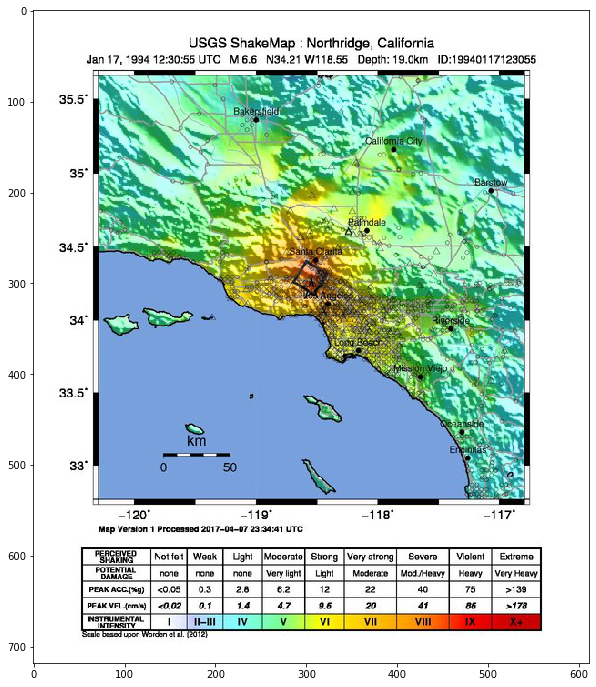

In [9]:
## Get the intensity image
## (use getContent('intensity.jpg', 'intensity.jpg') to save a local file)
img = product.getContentBytes('intensity.jpg')[0]

image = Image.open(io.BytesIO(img))

plt.figure(figsize=(10, 12))
plt.imshow(np.asarray(image))
plt.show()